## Punto 1
Primero, elijamos una curva para hacer el ajuste. En este caso consideraremos primero un polinomio de grado 2:
$$y(x) = a x^2 + bx + c$$
veamos su ajuste:

Obtuvimos mejores parametros a, b, c de [-0.18939394  2.15606061 -0.45454545]


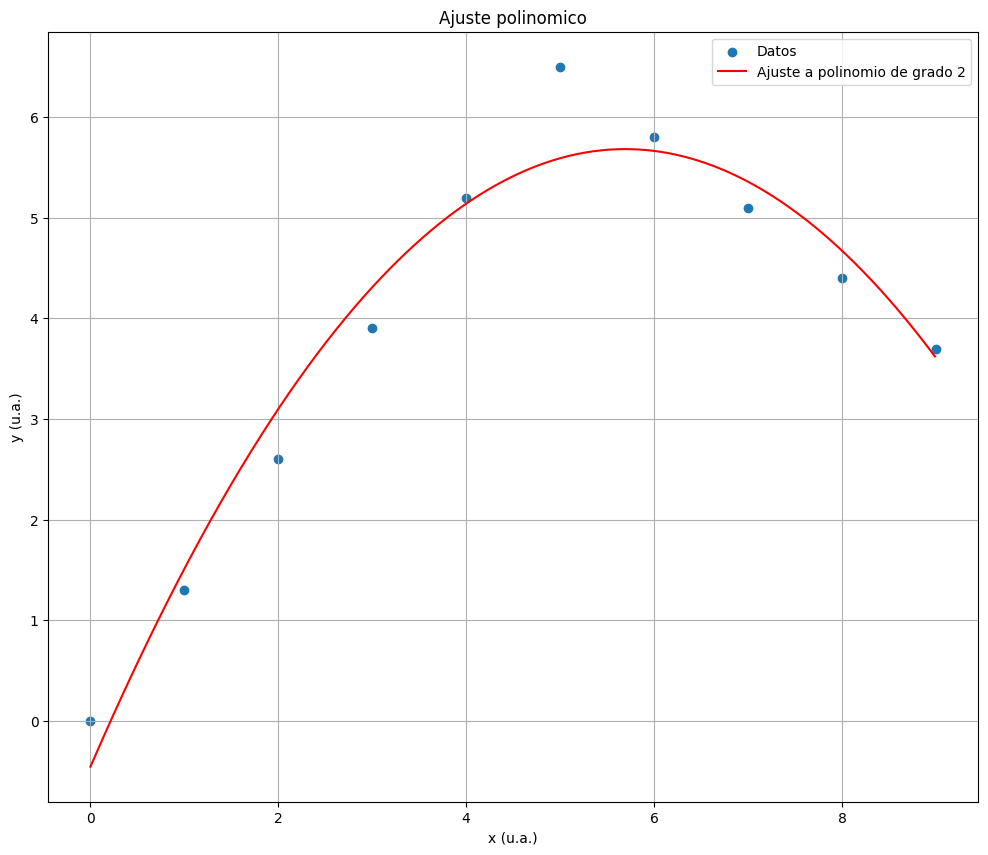

In [2]:
# Buen trabajo
#5.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leyendo los datos
df = pd.read_csv("fit_curve.csv")
x = df.x.to_numpy()
y = df.y.to_numpy()

# Primero propongamos una parabola para ajustar la curva:
def Parabola(x, a, b, c):
    return a*x**2 + b*x + c

# Realicemos el ajuste:
popt, pcov = curve_fit(Parabola, x, y)

print("Obtuvimos mejores parametros a, b, c de", popt)

t = np.arange(x[0], x[-1], 0.01)
plt.figure(figsize=(12,10))
plt.scatter(x,y, label = "Datos")
plt.plot(t, Parabola(t, *popt), color = "red", label="Ajuste a polinomio de grado 2")
plt.grid()
plt.legend()
plt.xlabel("x (u.a.)")
plt.ylabel("y (u.a.)")
plt.title("Ajuste polinomico")
plt.show()

Podemos utilizar alguna funcion ("costo") para cuantificar lo bueno que es el ajuste. En este caso utilicemos la suma del cuadrado de las diferencias:
$$J(\bold{w}) = \sum_{i=1}^m \left( f(x^{(i)},\bold{w}) - y^{(i)} \right)^2$$
donde $\bold{w}$ es el arreglo de parametros de ajuste, $m$ es el numero de datos, $f(x,\bold{w})$ es la funcion de ajuste, $x^{(i)}$ es el i-esimo dato independiente y $y^{(i)}$ es el i-esimo dato dependiente:

In [3]:
def squareddiff(x,y):
    return np.sum((x-y)**2)

errparabola = squareddiff(y, Parabola(x, *popt))
print("Obtuvimos un error para el ajuste parabolico de",np.round(errparabola,5))

Obtuvimos un error para el ajuste parabolico de 1.66667


Este error lo compararemos con otros ajustes. Ahora veamos el ajuste gaussiano:
$$f(x) = norm \times \exp \left( \frac{- \left(x - mean \right)^2 }{ 2 sigma^2} \right)$$

Obtuvimos mejores parametros norm, mean, sigma de [6.19486497 5.74654967 2.78281294]


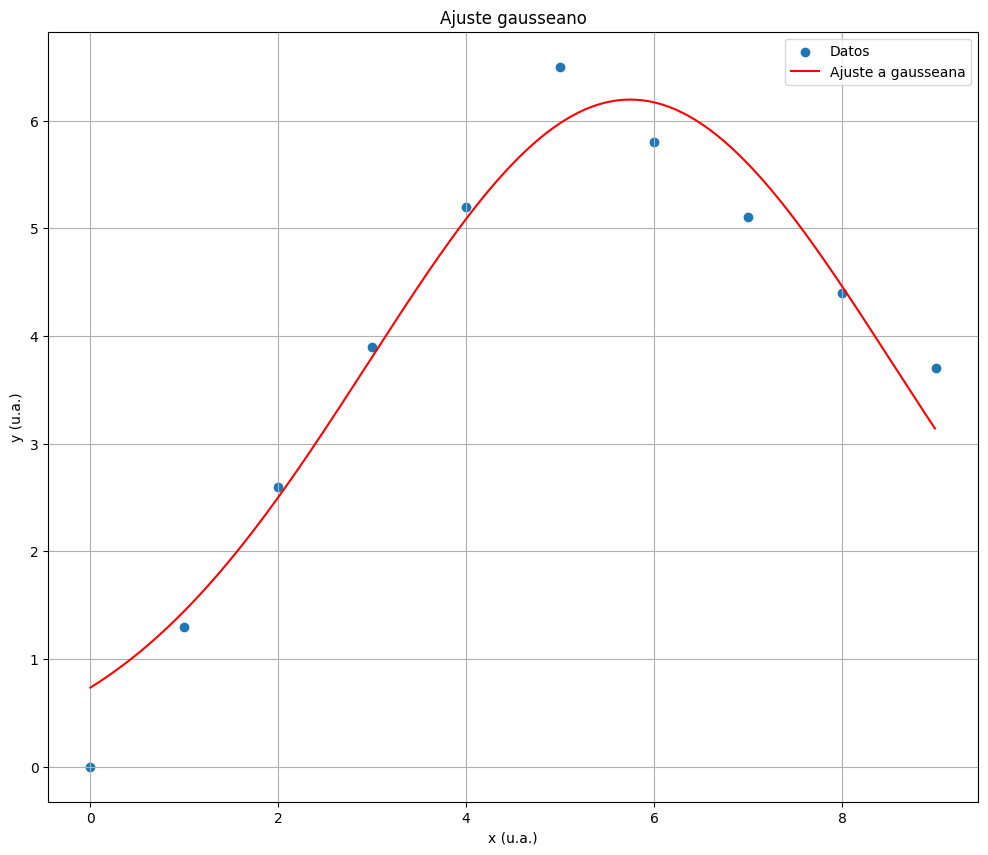

Obtuvimos un error para el ajuste gausseano de 1.58176


In [4]:
# Primero propongamos una parabola para ajustar la curva:
def gauss(x, norm ,mu, sg):
    return norm * np.exp(-(x-mu)**2/(2*sg**2))

# Realicemos el ajuste:
popt, pcov = curve_fit(gauss, x, y)

print("Obtuvimos mejores parametros norm, mean, sigma de", popt)

t = np.arange(x[0], x[-1], 0.01)
plt.figure(figsize=(12,10))
plt.scatter(x,y, label = "Datos")
plt.plot(t, gauss(t, *popt), color = "red", label="Ajuste a gausseana")
plt.grid()
plt.legend()
plt.xlabel("x (u.a.)")
plt.ylabel("y (u.a.)")
plt.title("Ajuste gausseano")
plt.show()

errgauss = squareddiff(y, gauss(x, *popt))
print("Obtuvimos un error para el ajuste gausseano de",np.round(errgauss,5))

Finalmente consideremos la funcion mas general que la gausseanaa:
$$ f(x) = x + b + gauss(x, norm, mean, sigma) $$

Obtuvimos mejores parametros norm, mean, sigma, b de [ 9.24475775e+03  3.05202494e+00  1.56197655e+02 -9.24344792e+03]


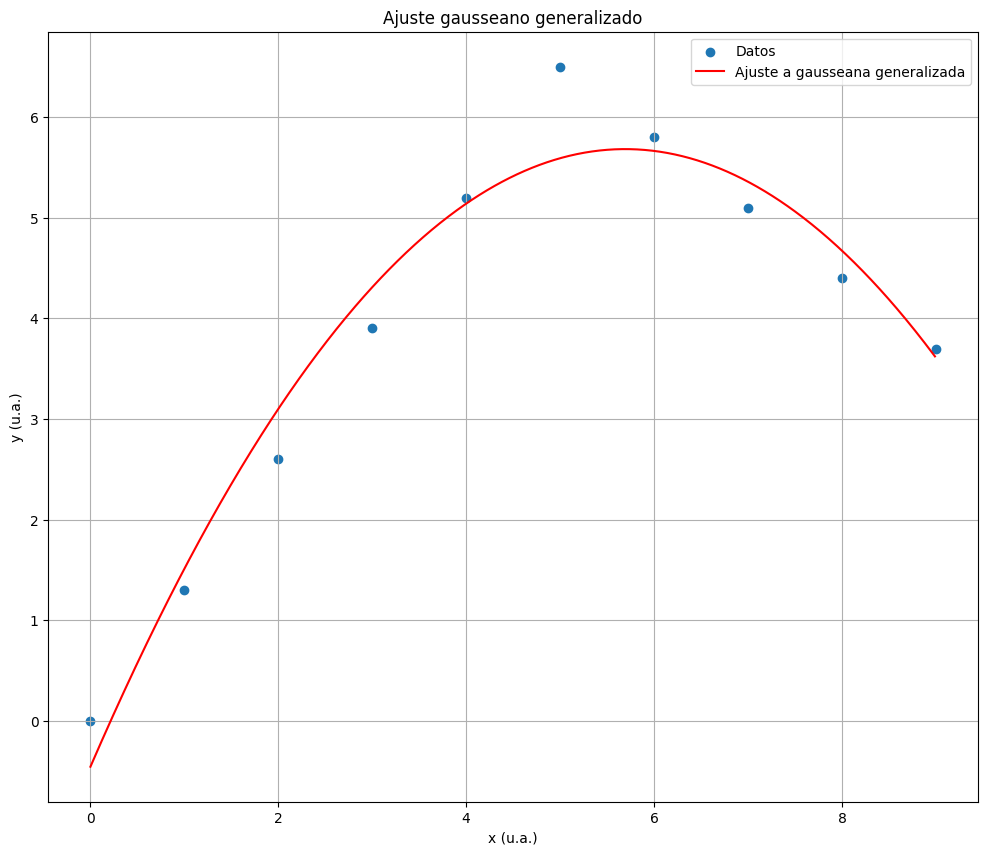

Obtuvimos un error para el ajuste gausseano generalizado de 1.66688


In [32]:
# Primero propongamos una parabola para ajustar la curva:
def gaussgen(x, norm ,mu, sg, b):
    return x + b + norm * np.exp(-(x-mu)**2/(2*sg**2))

# Realicemos el ajuste:
popt, pcov = curve_fit(gaussgen, x, y)

print("Obtuvimos mejores parametros norm, mean, sigma, b de", popt)

t = np.arange(x[0], x[-1], 0.01)
plt.figure(figsize=(12,10))
plt.scatter(x,y, label = "Datos")
plt.plot(t, gaussgen(t, *popt), color = "red", label="Ajuste a gausseana generalizada")
plt.grid()
plt.legend()
plt.xlabel("x (u.a.)")
plt.ylabel("y (u.a.)")
plt.title("Ajuste gausseano generalizado")
plt.show()

errgaussgen = squareddiff(y, gaussgen(x, *popt))
print("Obtuvimos un error para el ajuste gausseano generalizado de",np.round(errgaussgen,5))


De los tres ajustes realizados el que menor costo presenta es el de la funcion Gausseana no modificada. La parabola y la gausseana generalizada presentan un costo muy similar. No obstante los 3 ajustes son relativamente buenos y las diferencias en los costos no son grandes. 

## Punto 2
Analicemos el dataset. Primero veamos la forma de este:

In [33]:
# Leyendo los datos
#  Buen trabajo
df = pd.read_csv("auto.csv")
df = df.drop('Unnamed: 0', axis = 1)
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

Y veamos todas las columnas:

In [34]:
# Veamos las columnnas
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

Ahora, visualicemos la matriz de correlacion de los valores numericos, y luego veamos correlaciones entre algunos datos especificos mas a detalle:

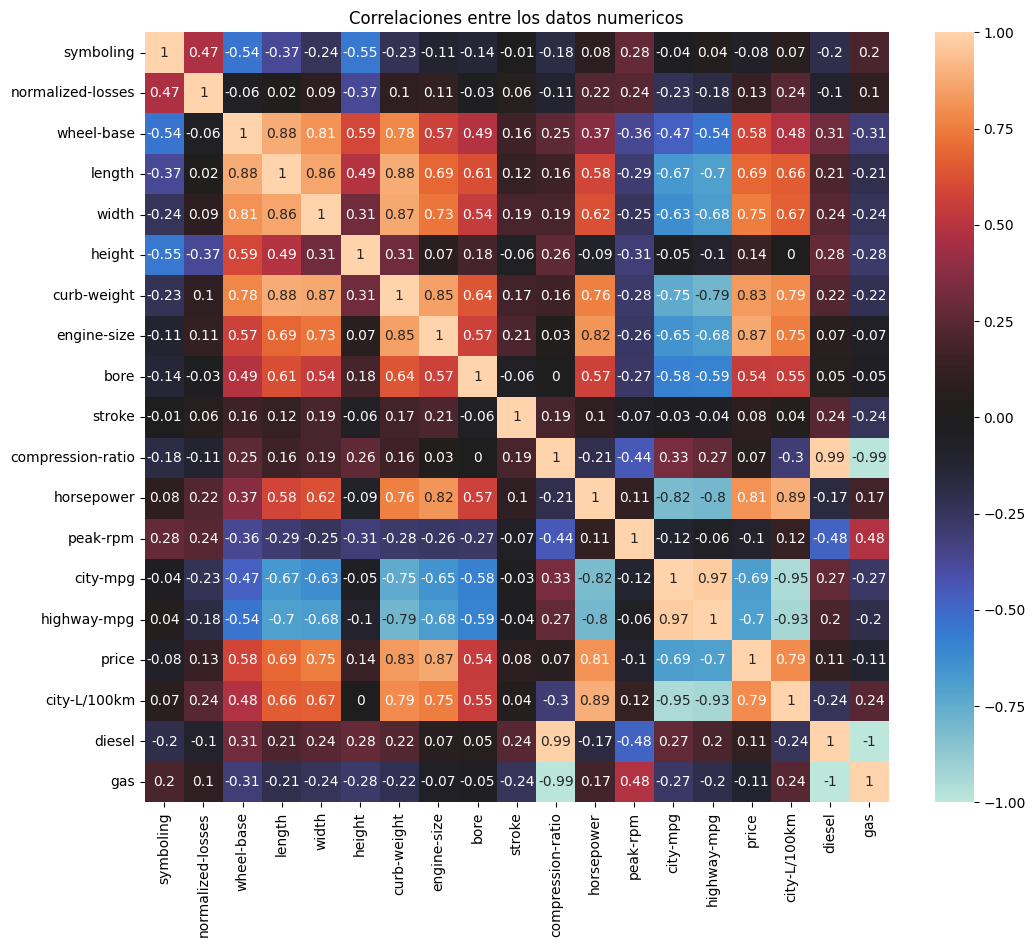

In [36]:
import seaborn as sns
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,10))
plt.title("Correlaciones entre los datos numericos")
sns.heatmap(matrix, annot = True, vmax=1, vmin=-1, center=0)
plt.show()

Veamos los datos que nos pueden dar informacion sobre la eficiencia de los vehiculos:

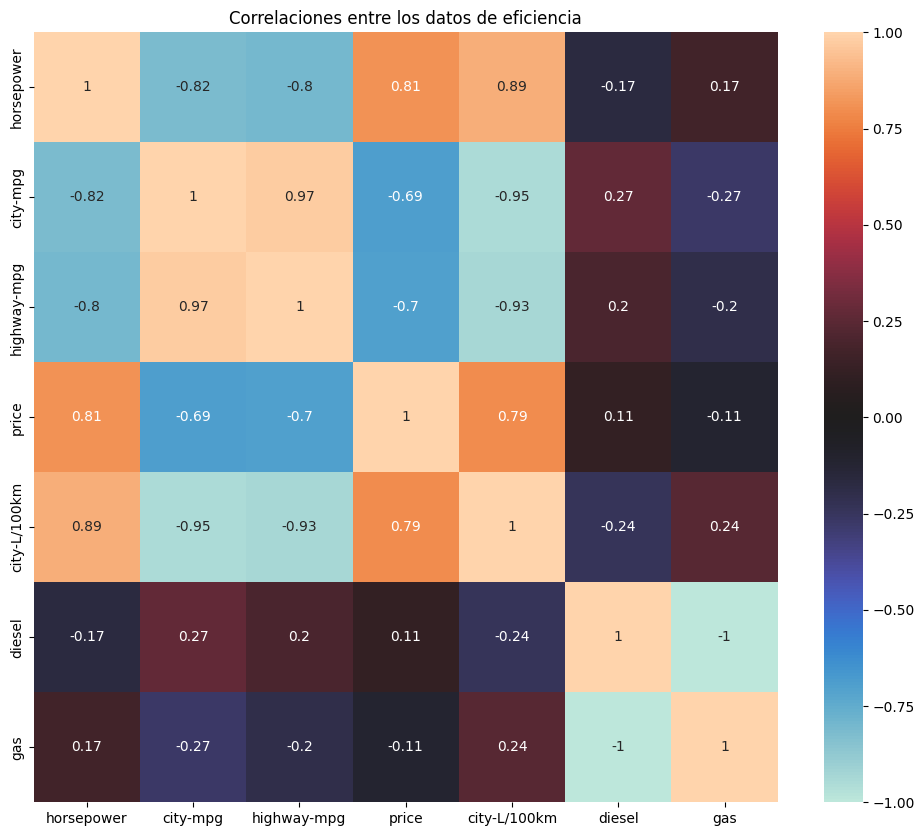

In [37]:
matrix = df.loc[:,["horsepower", "city-mpg" , "highway-mpg", "price", "city-L/100km", "diesel", "gas"]].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,10))
plt.title("Correlaciones entre los datos de eficiencia")
sns.heatmap(matrix, annot = True, vmax=1, vmin=-1, center=0)
plt.show()

Los litros por 100km (L/100km) estan positivamente correlacionado con el precio. Esto implica que los autos mas caros tienden a ser ineficientes. Los L/100km tambien estan positivamente relacionada con los caballos de fuerza. Es decir, autos potentes e ineficientes y autos costosos tienden a estar correlacionados.

Tambien vemos que los autos a diesel tienden a ser mas eficientes comparados a los autos a gasolina, mientras que los autos a gasolina tieden a ser mas potentes que los autos a diesel.

Ahora veamos como se relacionan los datos relacionados a las dimensiones del auto y del motor:

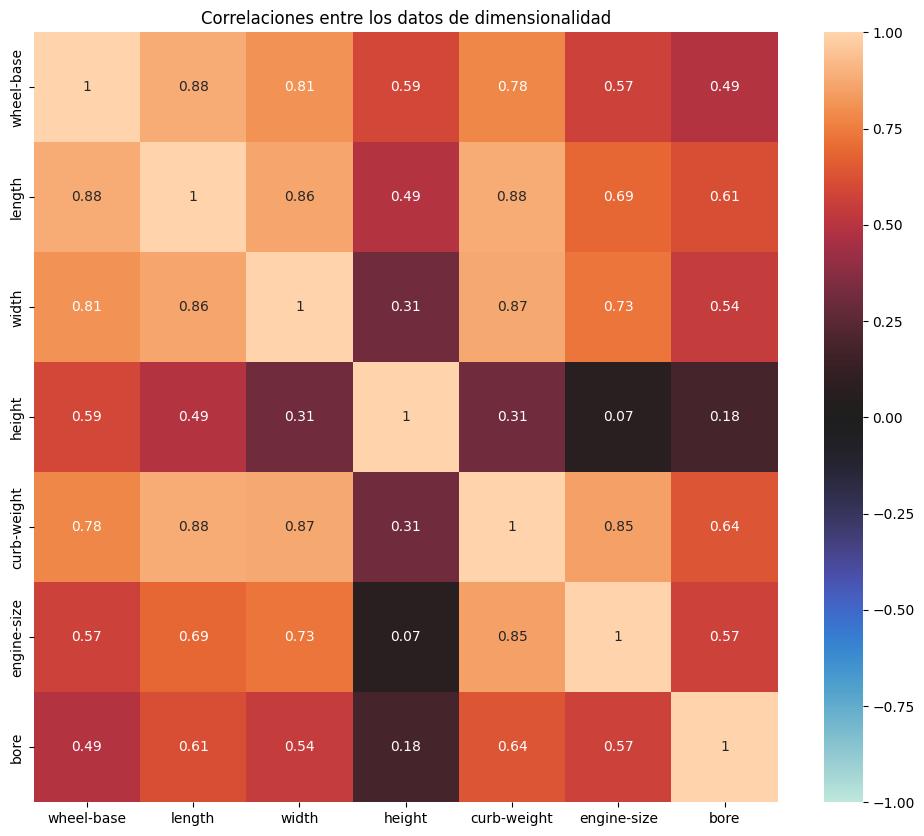

In [38]:
matrix = df.loc[:,['wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,10))
plt.title("Correlaciones entre los datos de dimensionalidad")
sns.heatmap(matrix, annot = True, vmax=1, vmin=-1, center=0)
plt.show()

Aca podemos ver que las dimensiones de los autos todas estan correlacionadas entre si positivamente, mientras que las dimensiones del motor tienden a estar un poco menos relacionadas. Esto quiere decir que a medida que los autos crecen, lo hacen en todas las dimensiones, no en una sola. Luego los autos que son solo altos, anchos o largos son poco comunes. Esto es consistente con la experiencia comun: Pocos autos tienen una dimension desproporcionada (Autos funebres, limosinas, pick ups, etc), la mayoria de autos grandes son proporcionalmente grandes. 

Ahora centremonos en la distribucion de los precios de autos a gasolina y autos diesel:

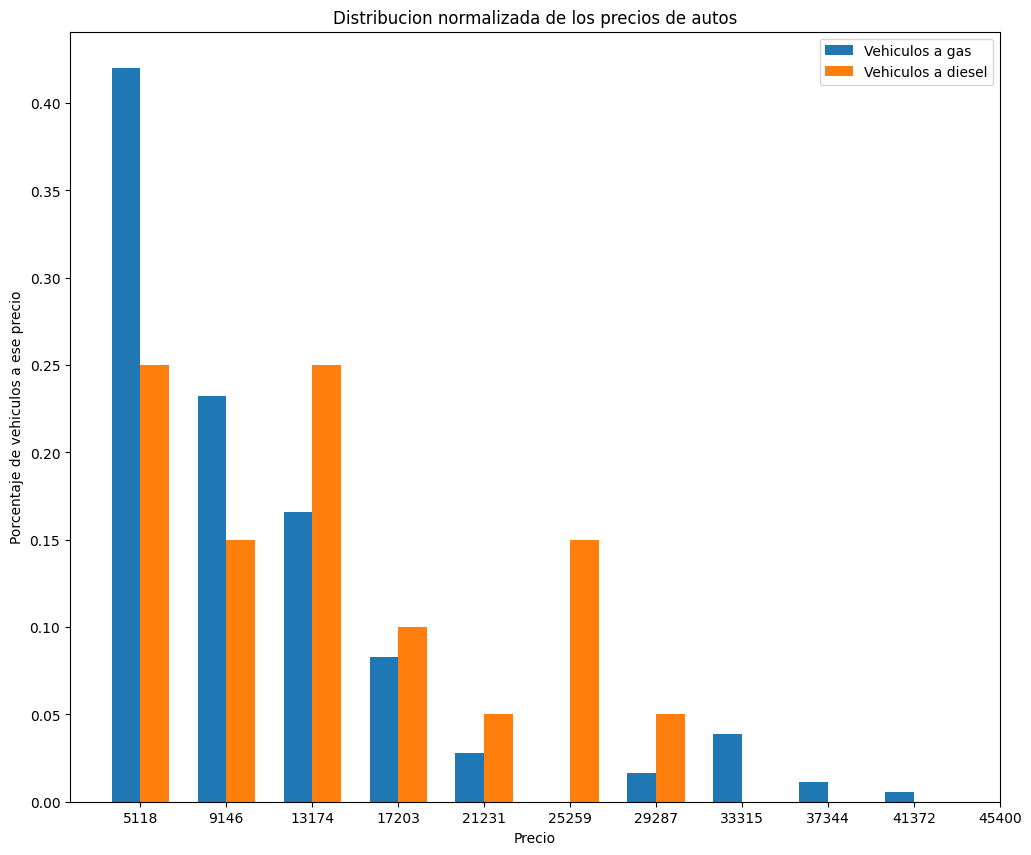

In [41]:
# Seleccionando los datos
df_diesel = df.loc[df["diesel"] == 1]
df_gas = df.loc[df["gas"] == 1]

plt.figure(figsize=(12,10))

# Generando los histogramas
gas_heights, gas_bins = np.histogram(df_gas["price"])
di_heights, di_bins = np.histogram(df_diesel["price"], bins = gas_bins)

gas_heights = gas_heights/ np.sum(gas_heights)
di_heights = di_heights/ np.sum(di_heights)

# Cambiando el ancho de los bins para mayor visibilidad
width = (gas_bins[1]- gas_bins[0])/3

plt.bar(gas_bins[:-1] - width/2, gas_heights, width=width, label= "Vehiculos a gas")
plt.bar(di_bins[:-1] + width/2, di_heights, width=width, label = "Vehiculos a diesel")
plt.xticks(gas_bins)
plt.xlabel("Precio")
plt.ylabel("Porcentaje de vehiculos a ese precio")
plt.legend()
plt.title("Distribucion normalizada de los precios de autos")
plt.show()

Es claro que la distribucion de precios es diferente. En primer lugar, notamos que los autos a gasolina siguen una especie de combinacion de 2 distribuciones: una para precios relativamento bajos y otra para precios altos. Esto puede indicarnos que existe un categoria de autos "lujosos" que dentro de los rangos mas altos de precio siguen su propia distribucion normal. Tambien notamos que los autos diesel tienden a ser mas costosos que los autos a gasolina, pero que no hay autos diesel que se comparen en precios con los autos mas costosos a gasolina.

Ahora queremos elegir 2 relaciones para la realizacion del informe. La matriz de correlaciones nos permite ver directamente las cuales variables estan mayormente correlacionadas. Seleccionamos las relaciones price - engine-size y city-mpg - horsepower. Veamos la graficas que nos muestran claramente la relacion:

/home/sino/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 800x600 with 0 Axes>

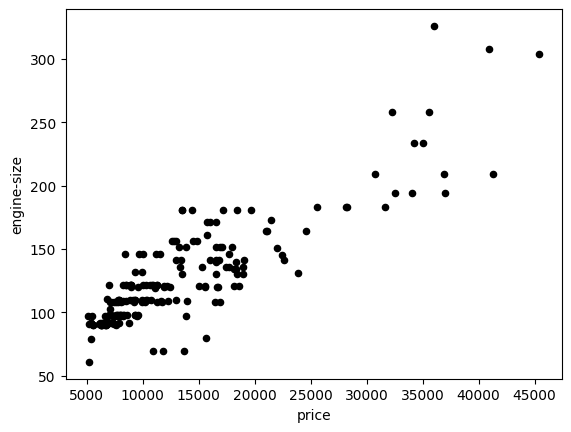

In [48]:
plt.figure(figsize=(8,6))
df.loc[:,['price', "engine-size"]].plot.scatter(x = "price", y = "engine-size", color = "black")
plt.show()

Claramente los autos de mayor precio tienen motores cada vez mas grande.

/home/sino/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 800x600 with 0 Axes>

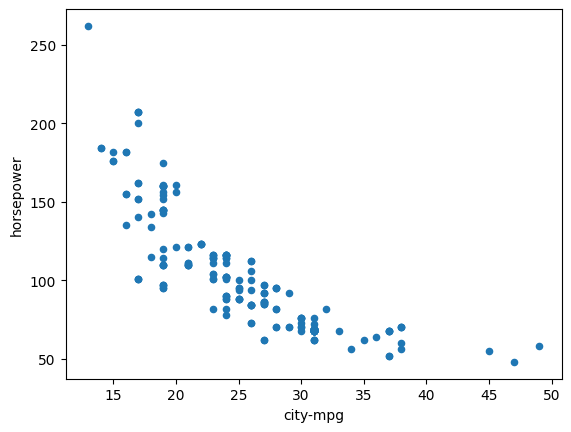

In [50]:
plt.figure(figsize=(8,6))
df.loc[:,['city-mpg', "horsepower"]].plot.scatter(x = 'city-mpg', y = "horsepower")
plt.show()

Claramente los autos de mayor eficiencia tienden a tener menos potencia.

### Informe: Precio de autos y eficiencia:
Se analizaron multiple datos de autos de diferentes fabricantes y se llego a las siguientes conclusiones:

1. Motores de gran dimension son indicativo de un alto precio del vehiculo. Esto implica que autos de alta potencia (la cual esta relacionada a las dimensiones del motor) tienden a pertenecer a los grupos de alto costo, ya bien porque son vehiculos destinados al transporte de meteriales o porque son vehiculos de lujo, los cuales tienden a dejar de lado la eficiencia a favor de un alto rendimiento en intervalos cortos de tiempo. Lo anterior sugiere que clientes interesados en vehiculos de uso personal se veran inclinados hacia vehiculos de costo moderado con motores de dimensiones reducidas.

2. Se encontro que vehiculos de alta eficiencia en el uso de combustible tienden a contar con baja potencia. Esto sugiere que clientes cuyas necesidades se enfocan en la movilidad se veran interesados en vehiculos de baja potencia, los cuales tienden a ser de costo moderado. Se sugiere ofrecer servicios adicionales a este tipo de compradores para aumentar margenes de ganancia. Entre estos se sugiere especialmente seguros contra accidentes y servicios de mantenimiento, ya que el uso relativamente menos frecuente de los vehiculos por parte de los compradores aumenta la rentabilidad de estos servicios bajo modelo de suscripcion. 